## BUNDESLIGA TRANSFERS EXPLORATORY ANALYSIS
### By Volker F.K. Tachin
###### 24th September 2022
---

The dataset was pulled from github at https://github.com/ewenme/transfers which is regularly updated from tranfermarkt.com.

This particular dataset `1-bundesliga.csv` contains 14k+ observations and 12 variables.
The variables and explanations can be found at [this readme](https://github.com/ewenme/transfers/blob/master/README.md)

Objectives:
- Perform data cleaning to ensure the dataset can be worked with
- Perform EDA to uncover meaningful insights
- Create a modified dataset to use to create a dashboard in PowerBI

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading data
data = pd.read_csv("transfers\\data\\1-bundesliga.csv")

## Data Exploration

In [3]:
data.head()

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season
0,1.FC Saarbrücken,Thomas Stratos,25.0,Defensive Midfield,Hamburger SV,€150Th.,in,Summer,0.15,1 Bundesliga,1992,1992/1993
1,1.FC Saarbrücken,Matthias Lust,22.0,Left Midfield,Waldh. Mannheim,free transfer,in,Summer,0.00,1 Bundesliga,1992,1992/1993
2,1.FC Saarbrücken,Henning Bürger,22.0,Left Midfield,FC Schalke 04,free transfer,in,Summer,0.00,1 Bundesliga,1992,1992/1993
3,1.FC Saarbrücken,Michael Hennig,20.0,midfield,FC Berlin,free transfer,in,Summer,0.00,1 Bundesliga,1992,1992/1993
4,1.FC Saarbrücken,Malik Badji,24.0,defence,CS Sedan,?,in,Summer,NaN,1 Bundesliga,1992,1992/1993


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14032 entries, 0 to 14031
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   club_name           14032 non-null  object 
 1   player_name         14032 non-null  object 
 2   age                 14030 non-null  float64
 3   position            14032 non-null  object 
 4   club_involved_name  14032 non-null  object 
 5   fee                 14031 non-null  object 
 6   transfer_movement   14032 non-null  object 
 7   transfer_period     14032 non-null  object 
 8   fee_cleaned         8202 non-null   float64
 9   league_name         14032 non-null  object 
 10  year                14032 non-null  int64  
 11  season              14032 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 1.3+ MB


In [5]:
data.describe()

,age,fee_cleaned,year
count,14030.000000,8202.000000,14032.000000
mean,24.479615,1.825107,2008.880844
std,4.389719,5.287139,8.650051
min,9.000000,0.000000,1992.000000
25%,21.000000,0.000000,2002.000000
50%,24.000000,0.175000,2010.000000
75%,27.000000,1.250000,2016.000000
max,42.000000,140.000000,2022.000000


In [6]:
#looking at the youngest player
data[data["age"] == 9.0]

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season
293,VfB Leipzig (- 2004),Marcel Geißler,9.0,midfield,Unknown,free transfer,in,Summer,0.0,1 Bundesliga,1993,1993/1994


In [7]:
#looking at the highest transfer amounts
data[data["fee_cleaned"] >= 80.0]

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season
10697,Borussia Dortmund,Ousmane Dembélé,20.0,Right Winger,Barcelona,€140.00m,out,Summer,140.0,1 Bundesliga,2017,2017/2018
11741,Bayern Munich,Lucas Hernández,23.0,Centre-Back,Atlético Madrid,€80.00m,in,Summer,80.0,1 Bundesliga,2019,2019/2020
12413,Bayer 04 Leverkusen,Kai Havertz,21.0,Attacking Midfield,Chelsea,€80.00m,out,Summer,80.0,1 Bundesliga,2020,2020/2021
12948,Borussia Dortmund,Jadon Sancho,21.0,Left Winger,Man Utd,€85.00m,out,Summer,85.0,1 Bundesliga,2021,2021/2022


In [8]:
#checking for duplicates
data.duplicated(keep = False).sum()

0

In [9]:
#checking null columns
data.isnull().sum()

club_name                0
player_name              0
age                      2
position                 0
club_involved_name       0
fee                      1
transfer_movement        0
transfer_period          0
fee_cleaned           5830
league_name              0
year                     0
season                   0
dtype: int64

In [10]:
data[data.fee_cleaned.isnull()]

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season
4,1.FC Saarbrücken,Malik Badji,24.0,defence,CS Sedan,?,in,Summer,NaN,1 Bundesliga,1992,1992/1993
5,1.FC Saarbrücken,Patrick Klyk,16.0,midfield,FV 08 Püttlingen,?,in,Summer,NaN,1 Bundesliga,1992,1992/1993
6,1.FC Saarbrücken,Stephan Beckenbauer,23.0,Defensive Midfield,FC Grenchen,?,in,Summer,NaN,1 Bundesliga,1992,1992/1993
7,1.FC Saarbrücken,Ralf Scherer,28.0,Defensive Midfield,SV Saar 05,?,in,Summer,NaN,1 Bundesliga,1992,1992/1993
8,1.FC Saarbrücken,Arno Glesius,26.0,Centre-Forward,Karlsruher SC,?,in,Summer,NaN,1 Bundesliga,1992,1992/1993
...,...,...,...,...,...,...,...,...,...,...,...,...
14027,SV Werder Bremen,Oscar Schönfelder,21.0,Left Winger,Jahn Regensburg,loan transfer,out,summer,NaN,1 Bundesliga,2022,2022/2023
14028,SV Werder Bremen,Luca Plogmann,22.0,Goalkeeper,Without Club,-,out,summer,NaN,1 Bundesliga,2022,2022/2023
14029,SV Werder Bremen,Mitchell Weiser,28.0,Right-Back,Bay. Leverkusen,"End of loanJun 30, 2022",out,summer,NaN,1 Bundesliga,2022,2022/2023
14030,SV Werder Bremen,Roger Assalé,28.0,Centre-Forward,Dijon,"End of loanJun 30, 2022",out,summer,NaN,1 Bundesliga,2022,2022/2023


In [11]:
#checking number of unique teams in the bundesliga
len(data.club_name.value_counts())

44

In [12]:
#checking clubs receiving trade
data.fee.value_counts()

free transfer              3347
-                          1935
loan transfer              1274
?                           671
€500Th.                     227
                           ... 
Loan fee:€35Th.               1
End of loanJan 30, 2010       1
End of loanJan 27, 2010       1
€460Th.                       1
End of loanAug 31, 2022       1
Name: fee, Length: 592, dtype: int64

In [13]:
data.transfer_movement.value_counts()

in     7117
out    6915
Name: transfer_movement, dtype: int64

In [14]:
data.transfer_period.value_counts()

Summer    10865
Winter     2628
summer      539
Name: transfer_period, dtype: int64

### Issues:
- `club_names` has some numbers in them
- NaN values in `fee_cleaned` column
- three `transfer_periods` (summer, Summer, Winter)
- ages need to be put in bins
- unnecessary `league_name` column

## Data Cleaning

### Issue 1: numbers in `club_names` columns

#### Code

In [15]:
#creating a copy of dataframe to clean
df = data.copy()

In [16]:
df["club_name"] = df["club_name"].str.replace("1.", "").str.strip()

C:\Users\Volker\AppData\Local\Temp\ipykernel_12628\3567881580.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["club_name"] = df["club_name"].str.replace("1.", "").str.strip()


#### Test

In [17]:
df.club_name.str.contains("1.").sum()

0

In [18]:
df.head()

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season
0,FC Saarbrücken,Thomas Stratos,25.0,Defensive Midfield,Hamburger SV,€150Th.,in,Summer,0.15,1 Bundesliga,1992,1992/1993
1,FC Saarbrücken,Matthias Lust,22.0,Left Midfield,Waldh. Mannheim,free transfer,in,Summer,0.00,1 Bundesliga,1992,1992/1993
2,FC Saarbrücken,Henning Bürger,22.0,Left Midfield,FC Schalke 04,free transfer,in,Summer,0.00,1 Bundesliga,1992,1992/1993
3,FC Saarbrücken,Michael Hennig,20.0,midfield,FC Berlin,free transfer,in,Summer,0.00,1 Bundesliga,1992,1992/1993
4,FC Saarbrücken,Malik Badji,24.0,defence,CS Sedan,?,in,Summer,NaN,1 Bundesliga,1992,1992/1993


### Issue 2: NaN values in `fee_cleaned` column
#### Remark: Upon inspection, it turns out the NaN values could be dropped or left unchanged. I chose to keep these rows

#### Code

### Issue 3: three `transfer_periods` (summer, Summer, Winter)

#### Code : replace "summer" with "Summer"

In [19]:
df["transfer_period"] = df.transfer_period.str.replace("summer", "Summer")

#### Test

In [20]:
df.transfer_period.value_counts()

Summer    11404
Winter     2628
Name: transfer_period, dtype: int64

### Issue 4: `ages` not in bins

#### Code: create new `age_groups` column based on `age` column

In [40]:
df["age_group"] = pd.cut(x = df["age"], bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],  labels = ["0 to 5", "6 to 10", "11 to 15", "16 to 20", "21 - 25", "26 - 30", "31 - 35", "36 - 40", "41 to 45", "46 - 50"])

#### Test

In [41]:
df.age_group.value_counts()

21 - 25     5915
26 - 30     3825
16 to 20    2855
31 - 35     1256
36 - 40      170
41 to 45       5
11 to 15       3
6 to 10        1
0 to 5         0
46 - 50        0
Name: age_group, dtype: int64

In [23]:
df.head()

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,age_group
0,FC Saarbrücken,Thomas Stratos,25.0,Defensive Midfield,Hamburger SV,€150Th.,in,Summer,0.15,1 Bundesliga,1992,1992/1993,21 to 30
1,FC Saarbrücken,Matthias Lust,22.0,Left Midfield,Waldh. Mannheim,free transfer,in,Summer,0.00,1 Bundesliga,1992,1992/1993,21 to 30
2,FC Saarbrücken,Henning Bürger,22.0,Left Midfield,FC Schalke 04,free transfer,in,Summer,0.00,1 Bundesliga,1992,1992/1993,21 to 30
3,FC Saarbrücken,Michael Hennig,20.0,midfield,FC Berlin,free transfer,in,Summer,0.00,1 Bundesliga,1992,1992/1993,11 to 20
4,FC Saarbrücken,Malik Badji,24.0,defence,CS Sedan,?,in,Summer,NaN,1 Bundesliga,1992,1992/1993,21 to 30


In [24]:
display(df.year.value_counts().head(10), df.year.value_counts().tail(5))

2021    605
2019    583
2015    572
2012    566
2020    564
2018    558
2016    550
2017    545
2014    543
2022    539
Name: year, dtype: int64

1994    330
1995    329
1997    322
1993    302
1992    273
Name: year, dtype: int64

## Data Visualisation

### Univariate Exploration

In [25]:
color = sns.color_palette()[0]

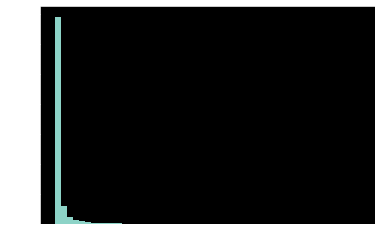

In [26]:
plt.hist(x = "fee_cleaned", data = df, bins = 50);

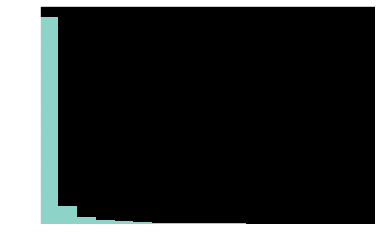

In [27]:
#zooming in on the portion of the histogram with most values
plt.hist(x = "fee_cleaned", data = df, bins = 50)
plt.xlim(0, 50)
plt.xticks(np.arange(0, 55, 5));
#plt.xscale("log");

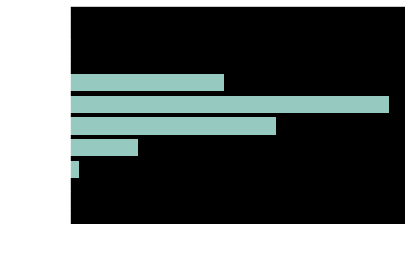

In [45]:
sns.countplot(y = "age_group", data = df, color = color);

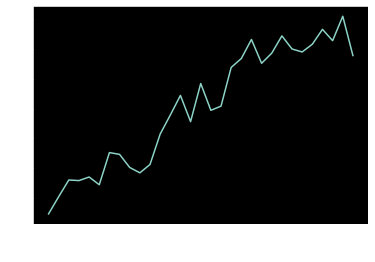

In [46]:
#grouping the data by year and visualising the number of transfers over time
years = df.groupby(by = "year").size()
years.plot();

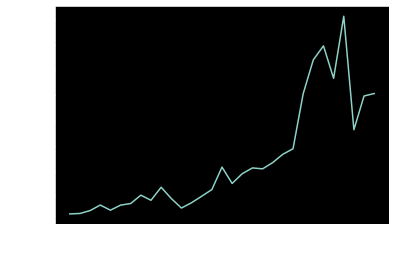

In [30]:
#comparing the total amounts spent on transfers over time
year_sum = df.groupby(by = "year")["fee_cleaned"].sum().reset_index()
sns.lineplot(x = "year", y = "fee_cleaned", data = year_sum);

In [31]:
year_sum.head()

,year,fee_cleaned
0,1992,59.698
1,1993,63.181
2,1994,86.272
3,1995,130.083
4,1996,89.260


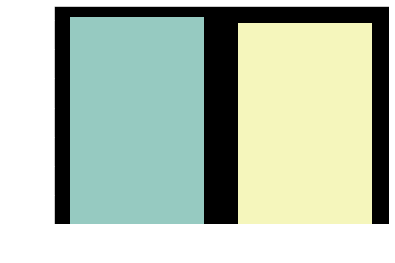

In [32]:
sns.countplot(data = df, x = "transfer_movement");

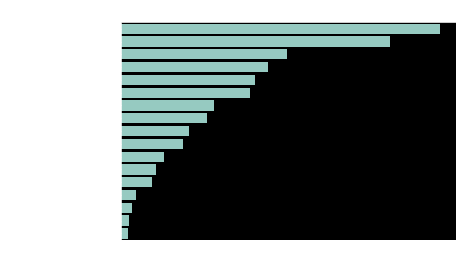

In [48]:
#share of positions
order = df.position.value_counts().index
sns.countplot(y =df.position, order = order, color = color)
plt.title("Distribution of player positions");

### Bivariate Visualisation

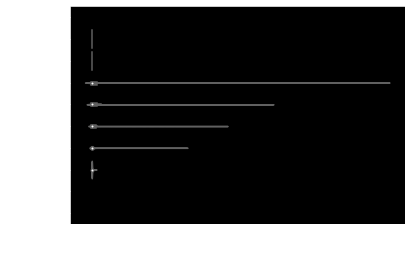

In [50]:
#looking at the transfer fee by age groups
sns.violinplot(y = "age_group", x = "fee_cleaned", data = df);

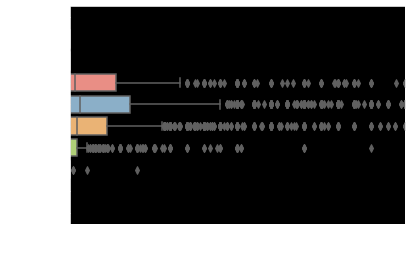

In [52]:
#changing x axes limits to focus on important part
xbars = np.arange(start = 0, stop = (df.fee_cleaned.max() * 1000000), step=100000)

sns.boxplot(y = df.age_group, x = df.fee_cleaned)
plt.ylabel("fees in millions of euros")
plt.xlim(0, 10);

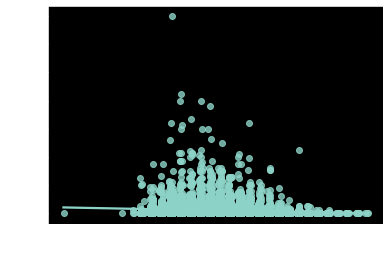

In [53]:
#looking at the correlation between age and transfer fees
sns.regplot(x = "age", y = "fee_cleaned", data = df, x_jitter = 0.2);

### Multivariate Visualisation

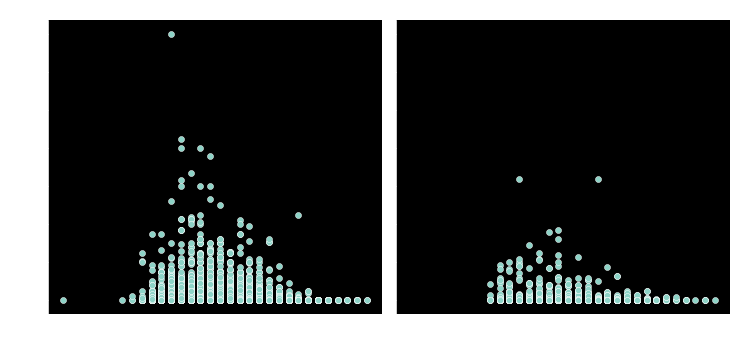

In [38]:
sns.relplot(x = "age", y = "fee_cleaned", data = df, col = "transfer_period", col_wrap = 4, x_jitter = 0.5);

In [39]:
df.to_csv("master.csv", index = False)

## Observations:
- Highest outbound transfer of the bundesliga was that of Ousmane Dembele; worth 140m euros in 2017/2018, Dortmund to FCB
- Youngest transer in the league was Marcel Geißler	in 1993/1994, 9yo
- The mean transfer fee is approximately 1.8m euros, while the median is 0.175000 or 175.000 euros
- Highest occuring age group is 21 to 30
- Center forwards, and centre-backs seem to be the highest share of players transfered
- Year 2021 saw the most number of transfers, followed closely by 2019 and 2015, while 1992 and 1993 had the lowest